Data Imports

In [1]:
#import necessary packages
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import statsmodels.api as sm 
from sklearn.linear_model import LinearRegression

In [2]:
#read CSV files
combineDF = pd.read_csv('data.csv')
touchdownDF = pd.read_csv('tds.csv')
leadersDF = pd.read_csv('tdleaders.csv')

In [3]:
combineDF.head()

,Rk,Year,Player,Pos,Age,AV,School,College,Height,Wt,40YD,Vertical,BenchReps,Broad Jump,3Cone,Shuttle,Drafted (tm/rnd/yr)
0,1,2010,Stephen Williams\WillSt01,WR,23.0,1.0,Toledo,College Stats,6-4,210,4.50,36.5,15.0,125.0,6.81,4.11,NaN
1,2,2010,Mike Williams\WillMi04,WR,22.0,27.0,Syracuse,College Stats,6-1,221,4.53,33.5,8.0,116.0,6.90,4.31,Tampa Bay Buccaneers / 4th / 101st pick / 2010
2,3,2010,Kyle Williams\WillKy01,WR,21.0,6.0,Arizona State,College Stats,5-10,188,4.40,33.0,11.0,118.0,7.00,4.19,San Francisco 49ers / 6th / 206th pick / 2010
3,4,2010,Damian Williams\WillDa04,WR,21.0,10.0,USC,College Stats,6-1,197,4.52,38.0,19.0,118.0,6.79,4.24,Tennessee Titans / 3rd / 77th pick / 2010
4,5,2010,Blair White\WhitBl00,WR,23.0,3.0,Michigan State,College Stats,6-2,209,4.49,33.5,18.0,115.0,6.69,4.03,NaN


In [28]:
#change any null values to 0 on the 40YD Dash
combineDF[combineDF['40YD'].isnull()] = 0

# dummyDF = combineDF['Drafted (tm/rnd/yr)'].str.split(' / ')
# dummyDF = dummyDF.notnull()
# dummyDF


#Break down the drafted column
# draft = []
# for item in combineDF['Drafted (tm/rnd/yr)']:
    
#     print(item)
#     if :
#         item = str(item)
#         draft = item.split(' / ')
#         print(draft)
#     #     if len(draft) > 1:
# #         team = draft[0]
# #         rnd = draft[1]
# #         pick = draft[2]
# #         year = draft[3]

In [5]:
touchdownDF.head()

,Rk,Date,G#,W#,Tm,Unnamed: 5,Opp,Result,Quarter,Type,Dist,Receiver,Age,Passer,Age.1,Score Before,Score After,Conversion
0,1,2011-09-12,1,1,NWE,@,MIA,W 38-24,4,Passing,99,Wes Welker,30-134,Tom Brady,34-040,Lead 31-17,Lead 38-17,Stephen Gostkowski kick succeeded
1,2,2011-12-24,15,16,NYG,@,NYJ,W 29-14,2,Passing,99,Victor Cruz,25-043,Eli Manning,30-355,Trail 3-7,Lead 10-7*,Lawrence Tynes kick succeeded
2,3,2011-10-23,7,7,PIT,@,ARI,W 32-20,2,Passing,95,Mike Wallace,25-083,Ben Roethlisberger,29-235,Lead 7-0,Lead 14-0,Shaun Suisham kick succeeded
3,4,2013-12-01,12,13,CLE,NaN,JAX,L 28-32,4,Passing,95,Josh Gordon,22-232,Brandon Weeden,30-048,Trail 21-25,Lead 28-25*,Billy Cundiff kick succeeded
4,5,2014-12-07,13,14,PIT,@,CIN,W 42-21,4,Passing,94,Martavis Bryant,22-352,Ben Roethlisberger,32-280,Lead 28-21,Lead 35-21,Shaun Suisham kick succeeded


In [6]:
leadersDF.head()

,Rk,Player,Year,Age,Draft,Tm,Lg,G,GS,Tgt,Rec,Yds,Y/R,TD,Y/G,Ctch%,Y/Tgt
0,1,Kenny Golladay\GollKe00,2019,26,3-96,DET,NFL,16,16,116,65,1190,18.31,11,74.4,56.0%,10.26
1,2,Cooper Kupp\KuppCo00,2019,26,3-69,LAR,NFL,16,14,134,94,1161,12.35,10,72.6,70.1%,8.66
2,3,Chris Godwin\GodwCh00,2019,23,3-84,TAM,NFL,14,14,121,86,1333,15.50,9,95.2,71.1%,11.02
3,4,Marvin Jones\JoneMa02,2019,29,5-166,DET,NFL,13,11,91,62,779,12.56,9,59.9,68.1%,8.56
4,5,DeVante Parker\ParkDe01,2019,26,1-14,MIA,NFL,16,14,128,72,1202,16.69,9,75.1,56.3%,9.39


In [7]:
combineDF.shape

(517, 17)

In [8]:
touchdownDF.shape

(401, 18)

In [9]:
leadersDF.shape

(119, 17)

In [10]:
#clean up Player Name and IDs from Combine Data
combineDF['Name'] = (combineDF['Player'].str.split("\\", expand = True)).loc[:,0]
combineDF['Player ID'] = (combineDF['Player'].str.split("\\", expand = True)).loc[:,1]

#drop duplicated names
combineDF = combineDF.drop_duplicates(subset=['Name'], keep=False)

In [11]:
#clean up Player Name and IDs from TD Leaders by Season Data
leadersDF['Name'] = (leadersDF['Player'].str.split("\\", expand = True)).loc[:,0]
leadersDF['Player ID'] = (leadersDF['Player'].str.split("\\", expand = True)).loc[:,1]

In [12]:
#players who ran the 40 yard dash 
runners = combineDF[combineDF['40YD'].notnull()]

In [13]:
#Find and create a two lists for the touchdowns scored by each player who ran in the combine and the number of touchdowns
tdList = []
numTDs = []
for player in combineDF['Name']:
    tdList.append(list(touchdownDF[touchdownDF['Receiver'] == player]['Dist']))
    numTDs.append(len(list(touchdownDF[touchdownDF['Receiver'] == player]['Dist'])))

In [14]:
#move the lists into the dataframe
combineDF['TDs'] = np.array(tdList)
combineDF['Number of TDs'] = np.array(numTDs)

In [15]:
# combineDF['allTDs'] = np.zeros(517)
# for i in range(517):
# #     print(tdList[i])
#     try:        
#         combineDF['allTDs'].iloc[i] = np.array(tdList[i])
#     except:
#         continue
# combineDF.tail()

In [16]:
#sort the dataframe to visualize the data
combineDF = combineDF.sort_values(by=['Number of TDs'], ascending = False)

In [17]:
combineDF.head(30)

,Rk,Year,Player,Pos,Age,AV,School,College,Height,Wt,...,Vertical,BenchReps,Broad Jump,3Cone,Shuttle,Drafted (tm/rnd/yr),Name,Player ID,TDs,Number of TDs
76,31,2011,A.J. Green\GreeA.00,WR,22.0,80.0,Georgia,College Stats,6-4,211,...,34.5,18.0,126.0,6.91,4.21,Cincinnati Bengals / 1st / 4th pick / 2011,A.J. Green,GreeA.00,"[82, 81, 77, 73, 57, 56, 53, 51]",8
29,30,2010,Dez Bryant\BryaDe01,WR,21.0,71.0,Oklahoma State,College Stats,6-2,225,...,NaN,NaN,NaN,NaN,NaN,Dallas Cowboys / 1st / 24th pick / 2010,Dez Bryant,BryaDe01,"[85, 68, 68, 65, 58, 58]",6
67,22,2011,Julio Jones\JoneJu02,WR,22.0,113.0,Alabama,College Stats,6-3,220,...,38.5,17.0,135.0,6.66,4.25,Atlanta Falcons / 1st / 6th pick / 2011,Julio Jones,JoneJu02,"[81, 80, 80, 75, 63, 54]",6
116,25,2012,T.Y. Hilton\HiltT.00,WR,22.0,77.0,Florida International,College Stats,5-9,183,...,NaN,NaN,NaN,NaN,NaN,Indianapolis Colts / 3rd / 92nd pick / 2012,T.Y. Hilton,HiltT.00,"[73, 73, 70, 61, 58]",5
8,9,2010,Golden Tate\TateGo00,WR,21.0,69.0,Notre Dame,College Stats,5-10,199,...,35.0,17.0,120.0,7.12,4.34,Seattle Seahawks / 2nd / 60th pick / 2010,Golden Tate,TateGo00,"[80, 73, 64, 61, 59]",5
27,28,2010,Eric Decker\DeckEr00,WR,22.0,52.0,Minnesota,College Stats,6-3,217,...,NaN,15.0,NaN,NaN,NaN,Denver Broncos / 3rd / 87th pick / 2010,Eric Decker,DeckEr00,"[74, 56, 52, 51]",4
146,8,2013,Kenny Stills\StilKe00,WR,20.0,38.0,Oklahoma,College Stats,6-0,194,...,33.5,16.0,124.0,NaN,4.35,New Orleans Saints / 5th / 144th pick / 2013,Kenny Stills,StilKe00,"[76, 69, 69, 52]",4
7,8,2010,Demaryius Thomas\ThomDe03,WR,22.0,81.0,Georgia Tech,College Stats,6-3,224,...,NaN,NaN,NaN,NaN,NaN,Denver Broncos / 1st / 22nd pick / 2010,Demaryius Thomas,ThomDe03,"[86, 78, 71, 63]",4
1,2,2010,Mike Williams\WillMi04,WR,22.0,27.0,Syracuse,College Stats,6-1,221,...,33.5,8.0,116.0,6.90,4.31,Tampa Bay Buccaneers / 4th / 101st pick / 2010,Mike Williams,WillMi04,"[80, 62, 61, 58]",4
30,31,2010,Antonio Brown\BrowAn04,WR,21.0,102.0,Central Michigan,College Stats,5-10,186,...,33.5,13.0,105.0,6.98,4.18,Pittsburgh Steelers / 6th / 195th pick / 2010,Antonio Brown,BrowAn04,"[79, 63, 60, 54]",4


In [18]:
#Create lists to find the number of touchdowns based on specific yardage markers
yd50 = 0
td50 = []
yd65 = 0
td65 = []
yd75 = 0
td75 = []
yd85 = 0
td85 = []
i = 0
for td in combineDF['TDs']:
    for yd in td:
        yd = int(yd)
        if yd >= 50:
            yd50 += 1
        if yd >= 65:
            yd65 += 1
        if yd >= 75:
            yd75 += 1
        if yd >= 85:
            yd85 += 1
    td50.append(yd50)    
    td65.append(yd65)
    td75.append(yd75)
    td85.append(yd85)
    yd50 = 0
    yd65 = 0
    yd75 = 0
    yd85 = 0    

In [19]:
#move the touchdown list to the dataframe
combineDF['50yd'] = td50
combineDF['65yd'] = td65
combineDF['75yd'] = td75
combineDF['85yd'] = td85

In [20]:
#run linear regression on data
X = combineDF.iloc[:, 10].values.reshape(-1, 1)
Y = combineDF.iloc[:, 21].values.reshape(-1, 1)
model = LinearRegression()
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

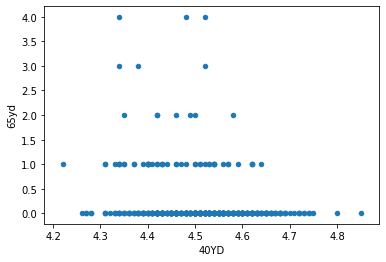

In [21]:
combineDF.plot.scatter('40YD', '65yd')

In [22]:
combineDF[combineDF['65yd']>0]['40YD'].mean()

4.453666666666665

In [23]:
combineDF[combineDF['85yd']>0]['40YD'].mean()

4.4511111111111115

In [24]:
combineDF[combineDF['Number of TDs']>0]['40YD'].mean()

4.4535

In [25]:
combineDF

,Rk,Year,Player,Pos,Age,AV,School,College,Height,Wt,...,Shuttle,Drafted (tm/rnd/yr),Name,Player ID,TDs,Number of TDs,50yd,65yd,75yd,85yd
76,31,2011,A.J. Green\GreeA.00,WR,22.0,80.0,Georgia,College Stats,6-4,211,...,4.21,Cincinnati Bengals / 1st / 4th pick / 2011,A.J. Green,GreeA.00,"[82, 81, 77, 73, 57, 56, 53, 51]",8,8,4,3,0
29,30,2010,Dez Bryant\BryaDe01,WR,21.0,71.0,Oklahoma State,College Stats,6-2,225,...,NaN,Dallas Cowboys / 1st / 24th pick / 2010,Dez Bryant,BryaDe01,"[85, 68, 68, 65, 58, 58]",6,6,4,1,1
67,22,2011,Julio Jones\JoneJu02,WR,22.0,113.0,Alabama,College Stats,6-3,220,...,4.25,Atlanta Falcons / 1st / 6th pick / 2011,Julio Jones,JoneJu02,"[81, 80, 80, 75, 63, 54]",6,6,4,4,0
116,25,2012,T.Y. Hilton\HiltT.00,WR,22.0,77.0,Florida International,College Stats,5-9,183,...,NaN,Indianapolis Colts / 3rd / 92nd pick / 2012,T.Y. Hilton,HiltT.00,"[73, 73, 70, 61, 58]",5,5,3,0,0
8,9,2010,Golden Tate\TateGo00,WR,21.0,69.0,Notre Dame,College Stats,5-10,199,...,4.34,Seattle Seahawks / 2nd / 60th pick / 2010,Golden Tate,TateGo00,"[80, 73, 64, 61, 59]",5,5,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,10,2014,Tevin Reese\ReesTe00,WR,23.0,NaN,Baylor,College Stats,5-10,163,...,4.18,San Diego Chargers / 7th / 240th pick / 2014,Tevin Reese,ReesTe00,[],0,0,0,0,0
185,9,2014,Paul Richardson\RichPa01,WR,21.0,15.0,Colorado,College Stats,6-0,175,...,NaN,Seattle Seahawks / 2nd / 45th pick / 2014,Paul Richardson,RichPa01,[],0,0,0,0,0
184,8,2014,Allen Robinson\RobiAl02,WR,20.0,36.0,Penn State,College Stats,6-3,220,...,4.00,Jacksonville Jaguars / 2nd / 61st pick / 2014,Allen Robinson,RobiAl02,[],0,0,0,0,0
183,7,2014,Jalen Saunders\SaunJa00,WR,21.0,0.0,Oklahoma,College Stats,5-9,165,...,NaN,New York Jets / 4th / 104th pick / 2014,Jalen Saunders,SaunJa00,[],0,0,0,0,0


In [26]:
#calculate key stats for the yardage markers
trialList = {}

meanData = combineDF['40YD'].mean()
medianData = combineDF['40YD'].median()
modeData = combineDF['40YD'].mode()
totalData = combineDF.shape[0]

mean50 = combineDF[combineDF['50yd']>0]['40YD'].mean()
median50 = combineDF[combineDF['50yd']>0]['40YD'].median()
mode50 = combineDF[combineDF['50yd']>0]['40YD'].mode()
total50 = combineDF[combineDF['50yd']>0]['40YD'].shape[0]

mean65 = combineDF[combineDF['65yd']>0]['40YD'].mean()
median65 = combineDF[combineDF['65yd']>0]['40YD'].median()
mode65 = combineDF[combineDF['65yd']>0]['40YD'].mode()
total65 = combineDF[combineDF['65yd']>0]['40YD'].shape[0]

mean75 = combineDF[combineDF['75yd']>0]['40YD'].mean()
median75 = combineDF[combineDF['75yd']>0]['40YD'].median()
mode75 = combineDF[combineDF['75yd']>0]['40YD'].mode()
total75 = combineDF[combineDF['75yd']>0]['40YD'].shape[0]

mean85 = combineDF[combineDF['85yd']>0]['40YD'].mean()
median85 = combineDF[combineDF['85yd']>0]['40YD'].median()
mode85 = combineDF[combineDF['85yd']>0]['40YD'].mode()
total85 = combineDF[combineDF['85yd']>0]['40YD'].shape[0]

trialList['Data'] = ({'mean' : meanData, 'median' : medianData, 'mode' : modeData, 'number' : totalData})
trialList['50'] = ({'mean' : mean50, 'median' : median50, 'mode' : mode50, 'number' : total50})
trialList['65'] = ({'mean' : mean65, 'median' : median65, 'mode' : mode65, 'number' : total65})
trialList['75'] = ({'mean' : mean75, 'median' : median75, 'mode' : mode75, 'number' : total75})
trialList['85'] = ({'mean' : mean85, 'median' : median85, 'mode' : mode85, 'number' : total85})

dfTable = pd.DataFrame(trialList)

In [27]:
dfTable

,Data,50,65,75,85
mean,4.50913,4.4535,4.45367,4.46405,4.45111
median,4.51,4.435,4.45,4.48,4.43
mode,0 4.5 dtype: float64,0 4.34 1 4.40 2 4.42 dtype: float64,0 4.34 1 4.40 dtype: float64,0 4.34 1 4.40 2 4.42 3 4.52 dtype:...,0 4.52 dtype: float64
number,481,80,60,37,9


In [33]:
combineDF.corr('pearson')

,Rk,Year,Age,AV,Wt,40YD,Vertical,BenchReps,Broad Jump,3Cone,Shuttle,Number of TDs,50yd,65yd,75yd,85yd
Rk,1.000000,0.061818,-0.021962,-0.011674,-0.037710,0.013907,0.000516,-0.070065,0.034980,0.048966,0.016238,-0.059241,-0.059241,-0.046307,-0.032971,0.005310
Year,0.061818,1.000000,-0.062996,-0.228785,0.061548,0.062991,-0.025258,-0.074559,0.212545,0.294763,0.182385,-0.238186,-0.238186,-0.208846,-0.180988,-0.087349
Age,-0.021962,-0.062996,1.000000,-0.214165,-0.047452,0.003585,0.032283,-0.050542,-0.043638,-0.117338,-0.071097,-0.079321,-0.079321,-0.057730,-0.024177,0.005203
AV,-0.011674,-0.228785,-0.214165,1.000000,0.057172,-0.088888,0.034942,0.048023,-0.025680,-0.017409,-0.010297,0.684010,0.684010,0.617434,0.549057,0.199444
Wt,-0.037710,0.061548,-0.047452,0.057172,1.000000,0.212086,0.024135,0.357823,0.097400,0.213667,0.147287,0.065481,0.065481,0.085824,0.103616,0.080434
40YD,0.013907,0.062991,0.003585,-0.088888,0.212086,1.000000,-0.395953,-0.149784,-0.403621,0.162412,0.151921,-0.194691,-0.194691,-0.194960,-0.131637,-0.083084
Vertical,0.000516,-0.025258,0.032283,0.034942,0.024135,-0.395953,1.000000,0.289362,0.612492,-0.183298,-0.206671,0.044192,0.044192,0.084768,0.064801,0.055933
BenchReps,-0.070065,-0.074559,-0.050542,0.048023,0.357823,-0.149784,0.289362,1.000000,0.193949,0.021517,-0.096610,0.080962,0.080962,0.118548,0.080763,0.032988
Broad Jump,0.034980,0.212545,-0.043638,-0.025680,0.097400,-0.403621,0.612492,0.193949,1.000000,-0.083907,-0.098550,0.044614,0.044614,0.093495,0.088822,-0.006763
3Cone,0.048966,0.294763,-0.117338,-0.017409,0.213667,0.162412,-0.183298,0.021517,-0.083907,1.000000,0.581514,-0.060743,-0.060743,-0.118221,-0.080848,0.007397
